In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data_file = "data/mouse_drug_data.csv"
clinical_trial_data_file = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_file)
clinical_trial_data = pd.read_csv(clinical_trial_data_file)

# Combine the data into a single dataset
complete_mouse_clinical_data = pd.merge(clinical_trial_data,mouse_drug_data, how="left", on=["Mouse ID"])

# Display the data table for preview
complete_mouse_clinical_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume_data = complete_mouse_clinical_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].mean()

#Resetting Index to default
mean_tumor_volume_data = mean_tumor_volume_data.reset_index()

# Convert to DataFrame
mean_tumor_volume_data_df = pd.DataFrame(mean_tumor_volume_data)

# Preview DataFrame
mean_tumor_volume_data_df


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error_tomor_vol = complete_mouse_clinical_data.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"].sem()

#Resetting Index to default
standard_error_tomor_vol = standard_error_tomor_vol.reset_index()

# Convert to DataFrame
standard_error_tomor_vol_df = pd.DataFrame(standard_error_tomor_vol)

# Preview DataFrame
standard_error_tomor_vol_df.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_volume_data_df = mean_tumor_volume_data_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
standard_error_tomor_vol_df = standard_error_tomor_vol_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')

# Preview that Reformatting worked
mean_tumor_volume_data_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


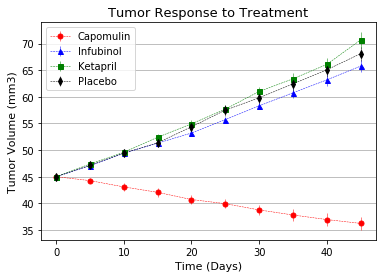

In [6]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_tumor_volume_data_df.index, mean_tumor_volume_data_df["Capomulin"], 
             yerr=standard_error_tomor_vol_df["Capomulin"],color="r", marker="o", markersize=5, 
             linestyle="dashed", linewidth=0.50,label="Capomulin")
plt.errorbar(mean_tumor_volume_data_df.index, mean_tumor_volume_data_df["Infubinol"], 
            yerr=standard_error_tomor_vol_df["Infubinol"], color="b", marker="^", markersize=5, 
            linestyle="dashed", linewidth=0.50, label="Infubinol")
plt.errorbar(mean_tumor_volume_data_df.index, mean_tumor_volume_data_df["Ketapril"],
            yerr=standard_error_tomor_vol_df["Ketapril"], color="g", marker="s", markersize=5, 
            linestyle="dashed", linewidth=0.50, label="Ketapril")
plt.errorbar(mean_tumor_volume_data_df.index, mean_tumor_volume_data_df["Placebo"],
             yerr=standard_error_tomor_vol_df["Placebo"], color="k", marker="d", markersize=5, 
             linestyle="dashed", linewidth=0.50, label ="Placebo")

#Dispalying the legends in best location
plt.legend(loc='best',frameon=True)

#Set X-Axis Label
plt.xlabel("Time (Days)",fontsize=11) 

#Set Y-Axis Label
plt.ylabel("Tumor Volume (mm3)",fontsize=11)

# Set Graph title
plt.title("Tumor Response to Treatment",fontsize=13)

# Save the figure
plt.savefig("graphs/TumerResponseToTreatment.png")

#Disabling Vertical grid lines from the graph
ax = plt.axes()        
ax.yaxis.grid() 

# Display the Graph
plt.show()


## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic_sites_data = complete_mouse_clinical_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
mean_metastatic_sites_data_df = pd.DataFrame(mean_metastatic_sites_data)

# Preview DataFrame
mean_metastatic_sites_data_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
standard_error_metastatic_sites = complete_mouse_clinical_data.groupby(["Drug","Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
standard_error_metastatic_sites_df = pd.DataFrame(standard_error_metastatic_sites)

# Preview DataFrame
standard_error_metastatic_sites_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
#Resetting Index to default
mean_metastatic_sites_data_df = mean_metastatic_sites_data_df.reset_index()
standard_error_metastatic_sites_df = standard_error_metastatic_sites_df.reset_index()

# Minor Data Munging to Re-Format the Data Frames
mean_metastatic_sites_data_df = mean_metastatic_sites_data_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')
standard_error_metastatic_sites_df = standard_error_metastatic_sites_df.pivot(index='Timepoint',columns='Drug',values='Metastatic Sites')

# Preview that Reformatting worked
standard_error_metastatic_sites_df.head()



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


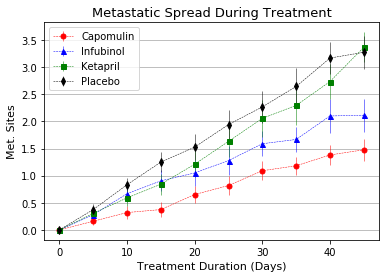

In [10]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_metastatic_sites_data_df.index, mean_metastatic_sites_data_df["Capomulin"], 
             yerr=standard_error_metastatic_sites_df["Capomulin"],color="r", marker="o", markersize=5, 
             linestyle="dashed", linewidth=0.50,label="Capomulin")
plt.errorbar(mean_metastatic_sites_data_df.index, mean_metastatic_sites_data_df["Infubinol"], 
            yerr=standard_error_metastatic_sites_df["Infubinol"], color="b", marker="^", markersize=5, 
            linestyle="dashed", linewidth=0.50, label="Infubinol")
plt.errorbar(mean_metastatic_sites_data_df.index, mean_metastatic_sites_data_df["Ketapril"],
            yerr=standard_error_metastatic_sites_df["Ketapril"], color="g", marker="s", markersize=5, 
            linestyle="dashed", linewidth=0.50, label="Ketapril")
plt.errorbar(mean_metastatic_sites_data_df.index, mean_metastatic_sites_data_df["Placebo"],
             yerr=standard_error_metastatic_sites_df["Placebo"], color="k", marker="d", markersize=5, 
             linestyle="dashed", linewidth=0.50, label ="Placebo")

#Dispalying the legends in best location
plt.legend(loc='best',frameon=True)

#Set X-Axis Label
plt.xlabel("Treatment Duration (Days)",fontsize=11) 

#Set Y-Axis Label
plt.ylabel("Met. Sites",fontsize=11)

# Set Graph title
plt.title("Metastatic Spread During Treatment",fontsize=13)

# Save the figure
plt.savefig("graphs/MetastaticSpreadDuringTreatment.png")

#Disabling Vertical grid lines from the graph
ax = plt.axes()        
ax.yaxis.grid() 

# Display the Graph
plt.show()



## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice_data = complete_mouse_clinical_data.groupby(["Drug","Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
count_mice_data_df = pd.DataFrame(count_mice_data)

#Reset Default Index
count_mice_data_df = count_mice_data_df.reset_index()

#Change column name "Mouse ID" as "Mouse Count"
count_mice_data_df.rename(columns = {"Mouse ID":"Mouse Count"},inplace=True)

# Preview DataFrame
count_mice_data_df.head()


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
count_mice_data_df = count_mice_data_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')

# Preview the Data Frame
count_mice_data_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


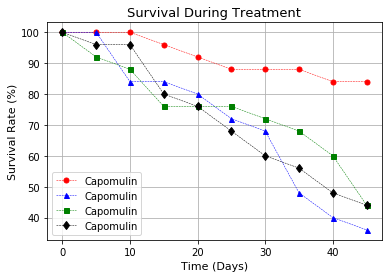

In [13]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * count_mice_data_df["Capomulin"]/25,"ro",linestyle="dashed",markersize=5, linewidth=0.50,label="Capomulin")
plt.plot(100 * count_mice_data_df["Infubinol"]/25, "b^",linestyle="dashed",markersize=5, linewidth=0.50,label="Capomulin")
plt.plot(100 * count_mice_data_df["Ketapril"]/25, "gs",linestyle="dashed",markersize=5, linewidth=0.50,label="Capomulin")
plt.plot(100 * count_mice_data_df["Placebo"]/25 , "kd",linestyle="dashed",markersize=6, linewidth=0.50,label="Capomulin")

#Dispalying the legends in best location
plt.legend(loc='best',frameon=True)

#Set X-Axis Label
plt.xlabel("Time (Days)",fontsize=11) 

#Set Y-Axis Label
plt.ylabel("Survival Rate (%)",fontsize=11)

# Set Graph title
plt.title("Survival During Treatment",fontsize=13)

#Displaying the background grid
plt.grid(True)

# Save the figure
plt.savefig("graphs/SurvivalDuringTreatment.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
tumor_percent_change =  100 * (mean_tumor_volume_data_df.iloc[-1] - mean_tumor_volume_data_df.iloc[0]) / mean_tumor_volume_data_df.iloc[0]

# Display the data to confirm
tumor_percent_change


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

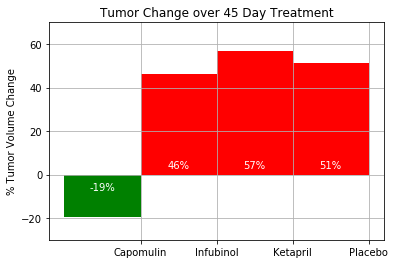

In [16]:
# Getting Passing Drugs
passing = tumor_percent_change < 0

# Orient widths. Add labels, tick marks, etc. 
#Get list of required drugs
drug_list = ['Capomulin','Infubinol','Ketapril','Placebo']

#Get Drugs's percent change into a list
change_list = [(tumor_percent_change[durg])for durg in drug_list]

#Defining bar chart
change_plt = plt.bar(drug_list,change_list,width=-1,align='edge',color=passing.map({True:'g',False:'r'}))
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')

# Use functions to label the percentages of changes
def setlabel(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            label_position = 2
        else:
            label_position = -8
            
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
        '%d' % int(height)+'%',color='white',
        ha='center', va='bottom')

# Call functions to implement the function calls
setlabel(change_plt)

# Save the Figure
plt.savefig("graphs/Summary_Bar_Graph.png")

# Show the Figure
plt.show()
